<a href="https://colab.research.google.com/github/AnujChandak11/Deep-Learning-Projects/blob/main/Cat%20vs%20Dog%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:14<00:00, 88.6MB/s]
100% 1.06G/1.06G [00:14<00:00, 78.0MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
#Gentators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalise
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [12]:
#CNN Model w/o normalisation & dropout
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 55s 85ms/step - loss: 0.5937 - accuracy: 0.6738 - val_loss: 0.4828 - val_accuracy: 0.7724
Epoch 2/10
625/625 [==============================] - 51s 80ms/step - loss: 0.4654 - accuracy: 0.7753 - val_loss: 0.4454 - val_accuracy: 0.7958
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.3611 - accuracy: 0.8342 - val_loss: 0.4646 - val_accuracy: 0.7956
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.2312 - accuracy: 0.9025 - val_loss: 0.6466 - val_accuracy: 0.8052
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1215 - accuracy: 0.9536 - val_loss: 0.7766 - val_accuracy: 0.7914
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0773 - accuracy: 0.9725 - val_loss: 0.9201 - val_accuracy: 0.8002
Epoch 7/10
625/625 [==============================] - 51s 80ms/step - loss: 0.0548 - accuracy: 0.9813 - val_loss: 0.9027 - val_accuracy:

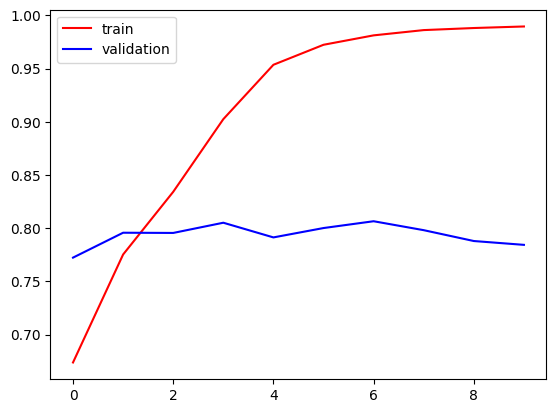

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

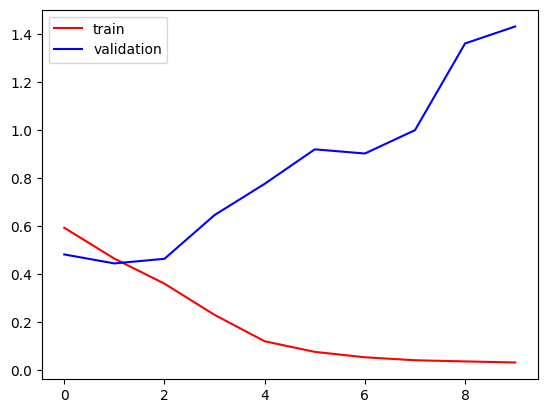

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
#CNN Model with normalization and dropouts
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 103ms/step - loss: 1.3383 - accuracy: 0.5937 - val_loss: 0.6648 - val_accuracy: 0.6202
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5750 - accuracy: 0.7043 - val_loss: 0.5050 - val_accuracy: 0.7602
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4827 - accuracy: 0.7684 - val_loss: 0.5368 - val_accuracy: 0.7596
Epoch 4/10
625/625 [==============================] - 65s 102ms/step - loss: 0.4134 - accuracy: 0.8135 - val_loss: 0.4721 - val_accuracy: 0.7858
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3412 - accuracy: 0.8497 - val_loss: 0.4868 - val_accuracy: 0.8000
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2757 - accuracy: 0.8796 - val_loss: 0.4872 - val_accuracy: 0.8116
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2091 - accuracy: 0.9151 - val_loss: 0.5290 - val_ac

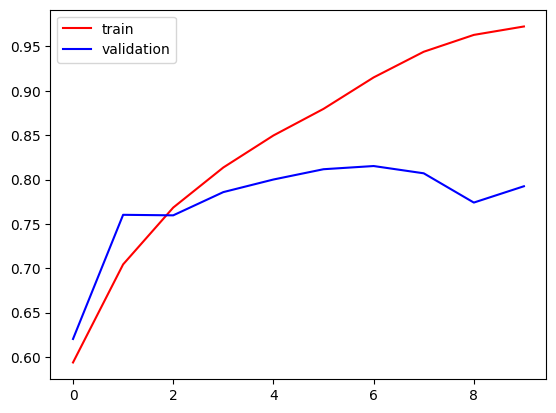

In [23]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

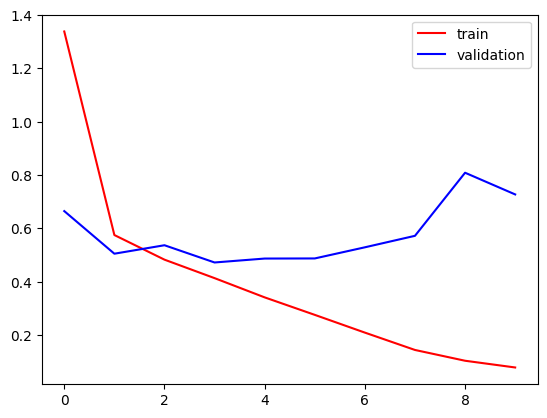

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [33]:
import cv2

In [45]:
test_img = cv2.imread('/content/dog.jpg')

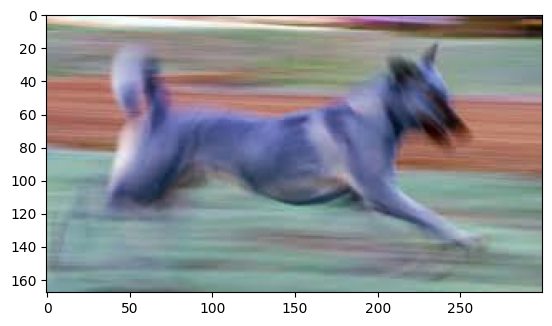

In [46]:
plt.imshow(test_img)

In [47]:
test_img = cv2.resize(test_img,(256,256))

In [48]:
test_input = test_img.reshape((1,256,256,3))

In [49]:
model.predict(test_input)

1/1 [==============================] - 1s 502ms/step


array([[1.]], dtype=float32)

In [50]:
test_img = cv2.imread('/content/dog2.jpg')

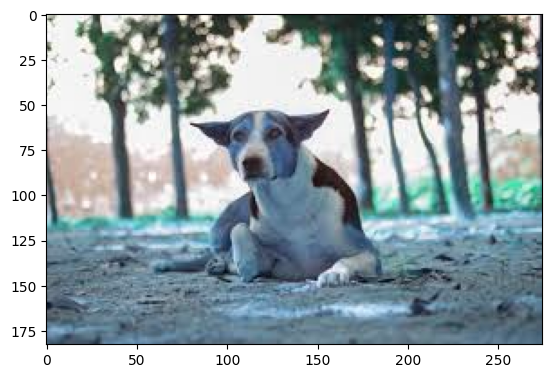

In [51]:
plt.imshow(test_img)

In [52]:
test_img = cv2.resize(test_img,(256,256))

In [53]:
test_input = test_img.reshape((1,256,256,3))

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [55]:
test_img = cv2.imread('/content/cat.jpg')

In [60]:
test_img = cv2.imread('/content/cat1.jpg')

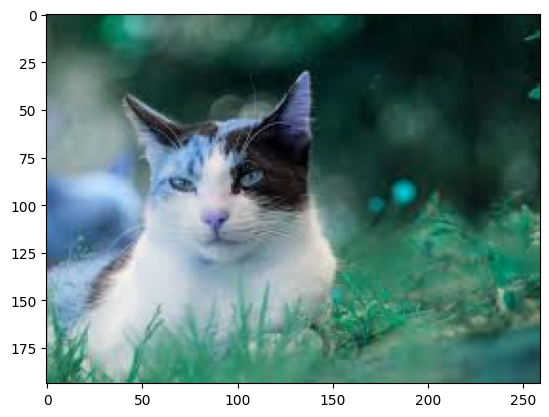

In [61]:
plt.imshow(test_img)

In [62]:
test_img = cv2.resize(test_img,(256,256))

In [63]:
test_input = test_img.reshape((1,256,256,3))

In [65]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)